# Testing Premade PyTorch models on CIFAR-10

## Resnet

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms

# Create transforms to preprocess data
# Convert to tensor then normalize to between -1 and 1 defining mean and std in each 3 image channels (rgb) 
# respectively
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize(256),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load training data into PyTorch DataLoader which automatically creates batches of given size over dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True, num_workers=2)

# Load testing data in same fashion
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                         shuffle=False, num_workers=2)

# Define class labels
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


torch.Size([8, 3, 256, 256])


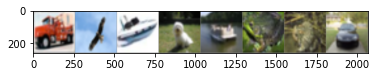

truck  bird  ship   dog  ship  frog  frog   car


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))